# Assignment, week 3: CIFAR-10 with pre-trained model

The goal for this weeks assignment was to create a classifier for CIFAR-10 dataset using a pre-trained model for feature extraction of the image data. The final classification will be made with a fully connected network layer.

First I downloaded the dataset separated to training and test sets.

In [14]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

I chose MobileNetV3Small as the pre-trained base model, as the images only needed to be resized up to 96x96 resolution from the CIFAR-10 32x32 size. This saves memory enough that there is no need to save the resized images to a separate file or folder.

In [15]:
from tensorflow.keras.applications import MobileNetV3Small

base_model = MobileNetV3Small(
    weights='imagenet',
    include_top=False,
    input_shape=(96, 96, 3)
    )

base_model.trainable = False

base_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/applications/mobilenet_v3.py:452: UserWarning: `input_shape` is undefined or non-square, or `rows` is not 224. Weights for input shape (224, 224) will be loaded as the default.
  return MobileNetV3(


Model: "MobileNetV3Small"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 96, 96, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_2         │ (None, 96, 96, 3) │          0 │ input_layer_3[0]… │
│ (Rescaling)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv (Conv2D)       │ (None, 48, 48,    │        432 │ rescaling_2[0][0] │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_bn             │ (None, 48, 48,    │         64 │ conv[0][0]        │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_36       │ (None, 48, 48,    │          0 │ conv_bn[0][0]     │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 49, 49,    │          0 │ activation_36[0]… │
│ (ZeroPadding2D)     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 24, 24,    │        144 │ expanded_conv_de… │
│ (DepthwiseConv2D)   │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 24, 24,    │         64 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_28 (ReLU)     │ (None, 24, 24,    │          0 │ expanded_conv_de… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_sque… │ (None, 1, 1, 16)  │          0 │ re_lu_28[0][0]    │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_sque… │ (None, 1, 1, 8)   │        136 │ expanded_conv_sq… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_sque… │ (None, 1, 1, 8)   │          0 │ expanded_conv_sq… │
│ (ReLU)              │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_sque… │ (None, 1, 1, 16)  │        144 │ expanded_conv_sq… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_18 (Add)        │ (None, 1, 1, 16)  │          0 │ expanded_conv_sq… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_29 (ReLU)     │ (None, 1, 1, 16)  │          0 │ add_18[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_18         │ (None, 1, 1, 16)  │          0 │ re_lu_29[0][0]    │
│ (Multiply)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_sque… │ (None, 24, 24,    │          0 │ re_lu_28[0][0],   │
│ (Multiply)          │ 16)               │            │ multiply_18[0][0] │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 939,120 (3.58 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 939,120 (3.58 MB)

Here I used the base model for feature extraction. The processing is done in batches to save memory.

In [17]:
import numpy as np
import tensorflow as tf

def extract_features(model, x, target_size=(96, 96), batch_size=64):
    num_samples = x.shape[0]
    features_list = []

    # Process the data in batches to save memory.
    for start in range(0, num_samples, batch_size):
        end = min(start + batch_size, num_samples)
        batch = tf.convert_to_tensor(x[start:end], dtype=tf.float32)

        # Resize images to the target size expected by the model
        resized_batch = tf.image.resize(batch, target_size)
        features = model(resized_batch, training=False)
        features_list.append(features.numpy())
    return np.concatenate(features_list, axis=0)

# Extract features
features_train = extract_features(base_model, x_train, target_size=(96, 96), batch_size=64)
features_test  = extract_features(base_model, x_test, target_size=(96, 96), batch_size=64)

print("Feature shapes:", features_train.shape, features_test.shape)


Feature shapes: (50000, 3, 3, 576) (10000, 3, 3, 576)


Here I created the fully connected top layer for classifying the images. The model has one hidden layer, in testing more layers reduced accuracy.

In [18]:
from keras import Input, Model
from keras.layers import Dense, Dropout, Flatten
from keras.models import Sequential

model = Sequential([
    Flatten(input_shape=base_model.output_shape[1:]),
    Dense(256, activation="relu"),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


I added earlystopping callback to prevent overfitting by stopping model fitting when no improvement is made.

In [19]:
from keras.callbacks import EarlyStopping

earlystopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min')

callbacks = [earlystopping]

The final layer is trained using validation split to monitor accuracy.

In [20]:
history = model.fit(
    features_train, y_train,
    epochs=100,
    validation_split=0.2,
    callbacks=callbacks,
    verbose=2)

Epoch 1/100
1250/1250 - 6s - 5ms/step - accuracy: 0.7117 - loss: 0.8792 - val_accuracy: 0.8039 - val_loss: 0.5804
Epoch 2/100
1250/1250 - 3s - 3ms/step - accuracy: 0.7914 - loss: 0.6198 - val_accuracy: 0.8112 - val_loss: 0.5488
Epoch 3/100
1250/1250 - 4s - 3ms/step - accuracy: 0.8199 - loss: 0.5300 - val_accuracy: 0.8162 - val_loss: 0.5509
Epoch 4/100
1250/1250 - 3s - 3ms/step - accuracy: 0.8432 - loss: 0.4572 - val_accuracy: 0.8263 - val_loss: 0.5381
Epoch 5/100
1250/1250 - 3s - 3ms/step - accuracy: 0.8582 - loss: 0.4129 - val_accuracy: 0.8287 - val_loss: 0.5597
Epoch 6/100
1250/1250 - 6s - 5ms/step - accuracy: 0.8751 - loss: 0.3625 - val_accuracy: 0.8251 - val_loss: 0.5813
Epoch 7/100
1250/1250 - 3s - 3ms/step - accuracy: 0.8801 - loss: 0.3458 - val_accuracy: 0.8272 - val_loss: 0.6143
Epoch 8/100
1250/1250 - 3s - 3ms/step - accuracy: 0.8918 - loss: 0.3106 - val_accuracy: 0.8330 - val_loss: 0.6354
Epoch 9/100
1250/1250 - 6s - 5ms/step - accuracy: 0.9028 - loss: 0.2832 - val_accuracy: 

Here the training and validation accuracy and loss are plotted. The graphs seem to show no sign of overfitting, as the training process is stopped using the callback.

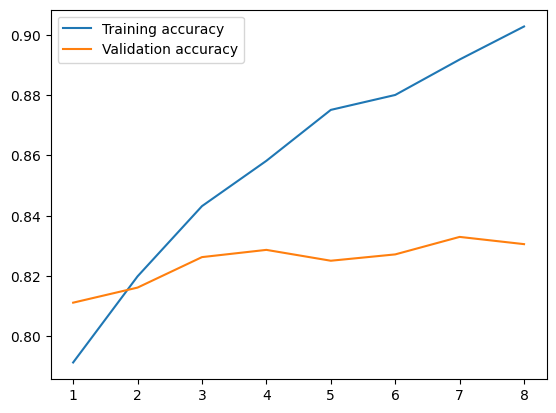

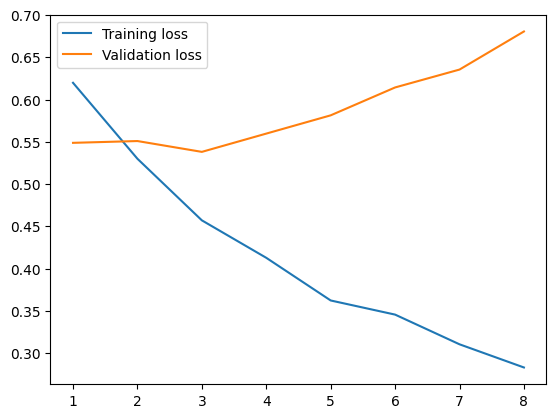

In [21]:
import matplotlib.pyplot as plt

accuracy = history.history["accuracy"][1:]
val_accuracy = history.history["val_accuracy"][1:]
loss = history.history["loss"][1:]
val_loss = history.history["val_loss"][1:]
epochs = list(range(1, len(accuracy)+1))
plt.plot(epochs, accuracy, label="Training accuracy")
plt.plot(epochs, val_accuracy, label="Validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, label="Training loss")
plt.plot(epochs, val_loss, label="Validation loss")
plt.legend()
plt.show()

Finally I evaluated the model using the test dataset.

In [22]:
test_scores = model.evaluate(features_test, y_test, verbose=2)

print("Test accuracy:", test_scores[1])
print("Test loss:", test_scores[0])

print("Final training accuracy:", history.history['accuracy'][-1])
print("Final training loss:", history.history['loss'][-1])

print("Final validation accuracy:", history.history['val_accuracy'][-1])
print("Final validation loss:", history.history['val_loss'][-1])

313/313 - 1s - 2ms/step - accuracy: 0.8241 - loss: 0.6763
Test accuracy: 0.8241000175476074
Test loss: 0.6762530207633972
Final training accuracy: 0.9027500152587891
Final training loss: 0.28324949741363525
Final validation accuracy: 0.8306000232696533
Final validation loss: 0.6804517507553101


The final accuracy for the model is 82% on the test set.